In [1]:
import numpy as np
import matplotlib.pyplot as plt

https://www.ams.org/news?news_id=6739&fbclid=IwAR1gNMJiEtimviZ95OGwTwQulWd82vf8wWpzgKyuqS1_PTtly1qSB0oTw04

In [44]:
!../.g

[master 8ae336f] web
 2 files changed, 332 insertions(+), 85 deletions(-)
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 55.08 KiB | 841.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   8621555..8ae336f  master -> master


## Exercise : animation


Try to get [this to work](https://matplotlib.org/gallery/animation/simple_anim.html#sphx-glr-gallery-animation-simple-anim-py)

---

# Exercises

[ROMMA](https://www.romma.fr/) est une association bénévole à but non lucratif
qui tient des stations meteo dans la region.


---

Saint-Martin-d'Hères - (38, Isère)
 
Vallée du Grésivaudan (220 m)  Longitude: 05° 45' 05" E   Latitude: 45° 10' 02" N

Station partenaire n°4

https://www.romma.fr/station_24.php?id=4&tempe=1

---

I scrape the pages to get the raw weather data

you can see how I did it [here](https://github.com/macbuse/ROMMA/blob/master/romma_again.ipynb)

to do  the excercise you need to download these files
from the repository [here](https://github.com/macbuse/ROMMA).
- Look for the button ```code```
- Click on it and choose zip
- Extract the files to the same place as your notebook (ipynb)

13Aug.pkl  
19July.pkl  
20July.pkl  
21July.pkl
22July.pkl  
28July.pkl

These files contain dictionaries of measurements
the keys are the numbers of weather stations.

There is also a key for the times that the measurements were taken.

In [2]:
import pickle
data = pickle.load(open('./13Aug.pkl','rb'))

In [3]:
data.keys()

dict_keys([3, 5, 109, 44, 4, 6, 'times'])

In [4]:

data[4] #st martin d'heres

{'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972900e+12,
        1.5972906e+12, 1.5972912e+12]),
 'temp': array([15.8, 15.9, 15.9, ...,  0. ,  0. ,  0. ]),
 'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
 'intenspluie': array([nan, nan, nan, ...,  0.,  0.,  0.]),
 'pression': array([1019.4, 1019.4, 1019.4, ...,    0. ,    0. ,    0. ]),
 'hum': array([84., 85., 85., ...,  0.,  0.,  0.]),
 'rad': array([19., 20., 22., ...,  0.,  0.,  0.]),
 'rafale': array([0., 0., 0., ..., 0., 0., 0.]),
 'vent': array([0., 0., 0., ..., 0., 0., 0.]),
 'ventdir': array([nan, nan, nan, ...,  0.,  0.,  0.])}

In [20]:
#this is the time of day 
#for each of the first 10 observations
data['times'][:10]

array([7.        , 7.16666667, 7.33333333, 7.5       , 7.66666667,
       7.83333333, 8.        , 8.16666667, 8.33333333, 8.5       ])

In [5]:
data['times'].shape, data[5]['temp'].shape

((144,), (4464,))

In [6]:
4464 % 144, 4464//144

(0, 31)

so there are 31 days of temperature measurements.

you should always plot a graph 
to see what things look like.

you can see that there are problems

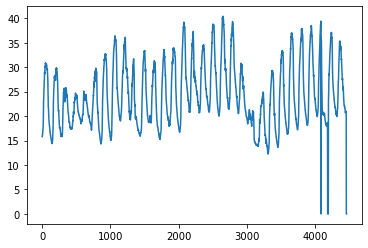

In [7]:
plt.plot(data[4]['temp']);

## Easiest question

Use scipy.stats.linregress to investigate the relation between temperature and humidity

In [8]:
import scipy
from scipy.stats import linregress

kk = 4
dd = data[kk]
T, H = dd['temp'], dd['hum']
result = linregress(T,H)
result.rvalue

-0.8189262579903029

Temperature and humidity are inversely  proportional

You can see this in  the graphs below

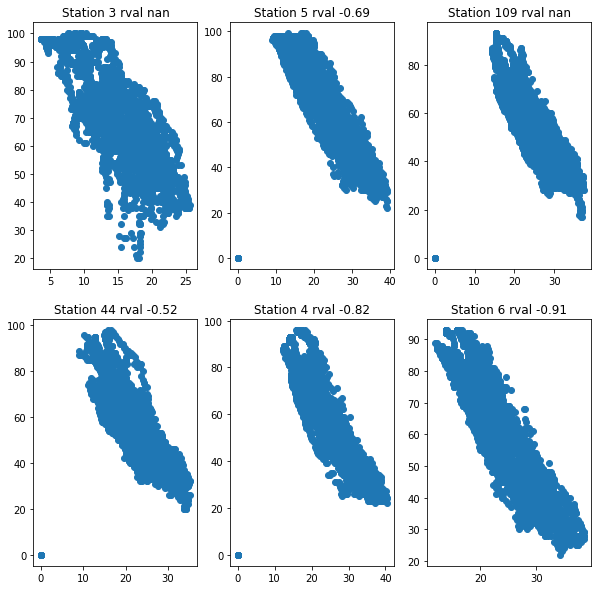

In [9]:


def clean(a,b):
    mask = ~np.isnan(a) & ~np.isnan(b)
    return a[mask], b[mask]

num_rows , num_cols = 2, 3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(10,10)

axs = axs.ravel()
for n, kk in enumerate(data.keys()):
    # use a test for being in the set/list
    if kk in ['times']: continue
    dd = data[kk]
    T, H = dd['temp'], dd['hum']
    # rval = nan => 
    #the data is corrupted with bad values 
    # we should do this 
    # T, H = clean(dd['temp'], dd['hum'])
    result = linregress(T, H)
    result.rvalue
    
    ax = axs[n]
    ax.scatter(dd['temp'], dd['hum']);
    ax.set_title('Station {} rval {:.2f}'.format(kk,result.rvalue))
    

---

## Sunlight

there is a problem with the first day
so we will skip the first 144 elements.


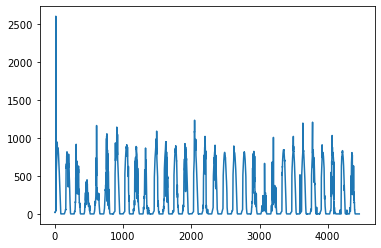

In [10]:
plt.plot(data[4]['rad']);

If you do it with a little loop
and put all the stations on the 
same figure then you can **easily** see that
1. The stations 4,5,6 are roughly the same
1. One is a bit cooler and also unreliable
1. One is a lot cooler

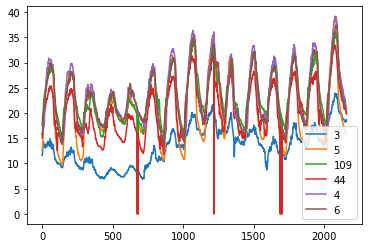

In [11]:
num_days = 15

for kk, dd in data.items():
    # use a test for being in the set/list
    if kk in ['times']: 
        #not a station
        continue 
    plt.plot(dd['temp'][:144*num_days], label=str(kk))
plt.legend();
    

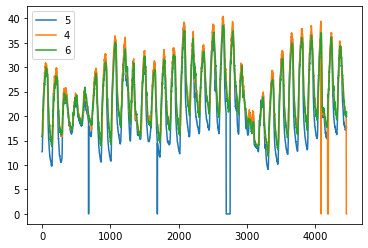

In [12]:
num_days = 31
for kk, dd in data.items():
    # use a test for being in the set/list
    if kk in ['times', 109, 44, 3]: 
        #not a station
        continue 
    plt.plot(dd['temp'][:144*num_days], label=str(kk))
plt.legend();

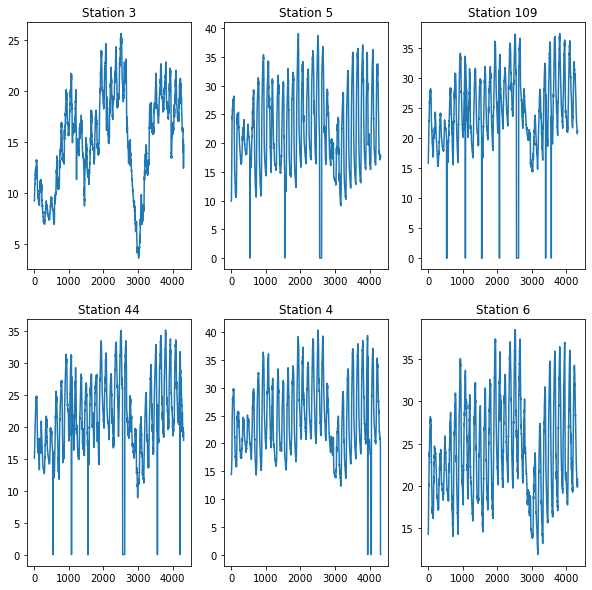

In [13]:
num_rows , num_cols = 2, 3
fig, axs = plt.subplots(num_rows, num_cols)

fig.set_size_inches(10,10)
axs = axs.ravel()
for n, kk in enumerate(data.keys()):
    # use a test for being in the set/list
    if kk in ['times']: 
        #not a station
        continue 
    dd = data[kk]
    ax = axs[n]
    ax.plot(dd['temp'][144:144*num_days])
    ax.set_title('Station ' + str(kk))


## compare sun and temp

The units are different so we have to normalize the data

- divide by the maximum

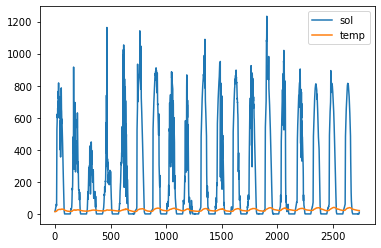

In [15]:
# compare sun and temp

stat = data[4]
# I don't want to modify the original data
S = np.copy(stat['rad'][144:20*144])
T  = np.copy(stat['temp'][144:20*144])
# Do the normalization
#S /= max(S)
#T /= max(T)
plt.plot(S,label='sol')
plt.plot(T,label='temp')
plt.legend();

## a better way ?

To learn more look [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)


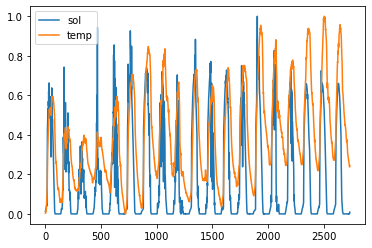

In [16]:
stat = data[4]
S = np.copy(stat['rad'][144:20*144])
T  = np.copy(stat['temp'][144:20*144])
S = (S - min(S))/ (max(S) - min(S)) 
T = (T - min(T))/ (max(T) - min(T)) 
plt.plot(S,label='sol')
plt.plot(T,label='temp')
plt.legend();

In [17]:
T = data[4]['temp']
T.shape

(4464,)

So you should change the first index to -1

In [19]:
T_days = T.reshape(-1,144)

temperure 7h -7h for first 24 hours

## fixing times

we started at 7h but 
we want to start at 00h

when we draw the graph
there is a line that shouldn't be there

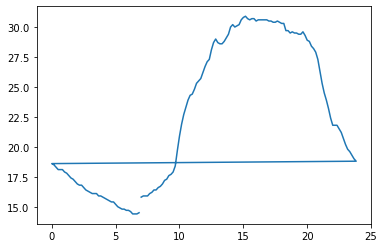

In [20]:
plt.plot(data['times'], T_days[0]);

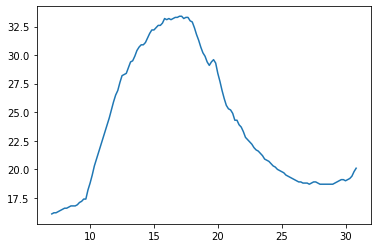

In [21]:
TT = np.roll(data['times'], 6*7)
plt.plot(TT + 7, T_days[10]);

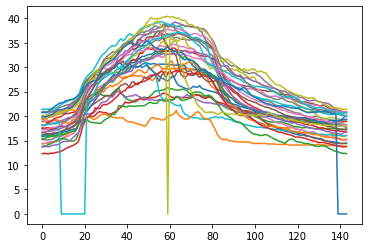

In [22]:
for day in T_days:
    plt.plot(day)

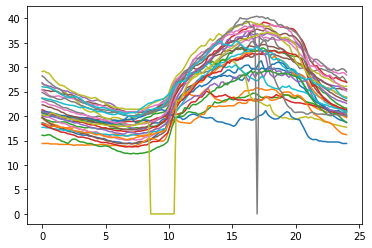

In [25]:
TT = T[144 - 6*7: - 6*7] # skip the first and last days
TT.shape[0] / 144

month = TT.reshape(30,144)
for day in month:
    plt.plot(np.linspace(0,24,6*24), day)

## maximum temperature for a month

this is easy to get but 
what we want is the max temp for each day.

In [26]:
np.max(month)

40.4

## max/min temperature for a day

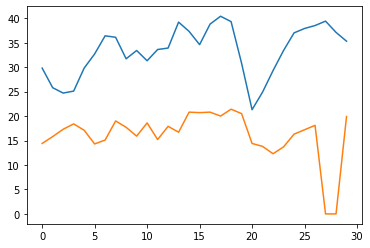

In [27]:
plt.plot(np.max(month,axis=1));
plt.plot(np.min(month,axis=1));

## Are they related ?

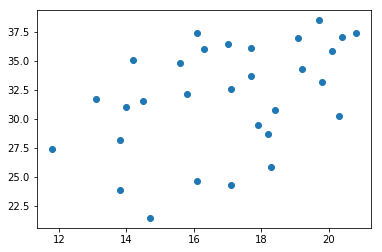

In [21]:
plt.scatter(np.min(month,axis=1), 
            np.max(month,axis=1));

## What about at 7h and max ?

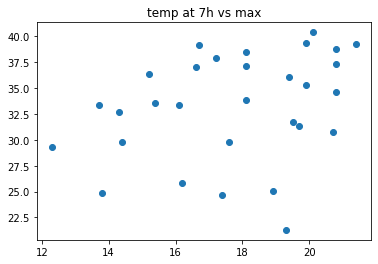

In [28]:
tt = 7
plt.scatter( month[:, tt*6],
            np.max(month,axis=1))
plt.title('temp at {}h vs max'.format(tt));

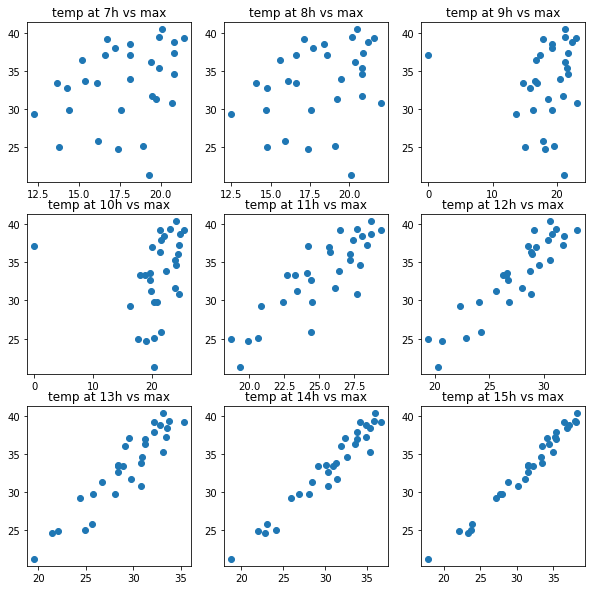

In [30]:
num_rows , num_cols = 3, 3
fig, axs = plt.subplots(num_rows, num_cols)

fig.set_size_inches(10,10)
# this is a clever way to avoid arithemetic in the loop
axs = axs.ravel()
for hh in range(7,16):
    ax = axs[hh - 7 ]
    ax.scatter( month[:, hh*6],
                 np.max(month,axis=1))
    ax.set_title('temp at {}h vs max'.format(hh));


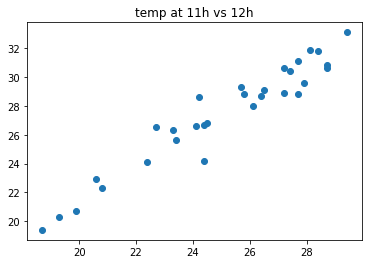

In [31]:
a, b  = 11, 12
plt.scatter( month[:, a*6],
             month[:, b*6 ])
plt.title('temp at {}h vs {}h'.format(a, b));

## average daily  temperature

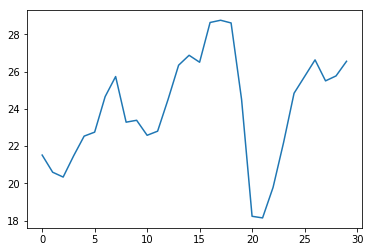

In [22]:
plt.plot(np.mean(month, axis=1));

# Solution to exo

Find the time when it was hottest for each station.

The first thing to do is find the index in the table row.

In [156]:
for day in month[:10]:
    print( np.where( day == max(day)))

(array([103, 106, 107]),)
(array([101]),)
(array([99]),)
(array([77]),)
(array([109]),)
(array([102, 105, 109]),)
(array([103]),)
(array([108]),)
(array([87, 88]),)
(array([102, 103]),)


# fancy indexing

there is a clever trick to get the times

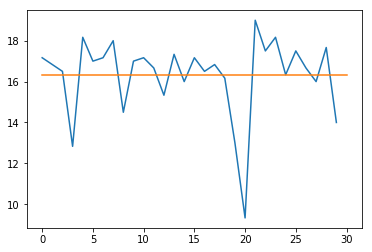

In [165]:
indices = [np.where( day == max(day))[0][0] 
                 for day in month]

hottest_time = np.linspace(0, 24, 144 + 1)[indices] 

plt.plot(hottest_time)
av = np.average(hottest_time)
plt.plot([0,30], [av,av]);

## Complete solution

In [15]:
time_of_day = np.linspace(0, 24, 144 + 1)
#this might not work test it!
start_index = int(data['times'][0]*6)
stations = {}

for kk, stuff in data.items():
    # skip this, not a station
    if kk in ['times']: continue
    # get 30 days  
    TT = stuff['temp'][144-start_index: 31*144-start_index]
    month = TT.reshape(30, 144)
    
    indices = [np.where( day == max(day))[0][0] 
                     for day in month]
    
    hottest_times = time_of_day[indices] 
    stations[kk] = hottest_times

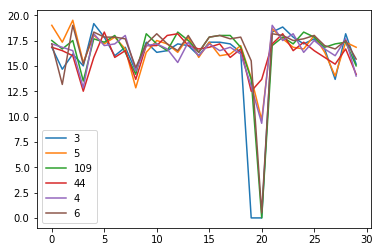

In [17]:
for kk, times in stations.items():
    plt.plot(times, label=kk)
plt.legend();

In [32]:
! ../.g

[master 8621555] web
 1 file changed, 1245 insertions(+), 1669 deletions(-)
 rewrite PROG/matplotlib_one_corr.ipynb (75%)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 620.86 KiB | 10.52 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   0639acd..8621555  master -> master


In [36]:
data[3] # which station is this ?

{'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972930e+12,
        1.5972936e+12, 1.5972942e+12]),
 'temp': array([11.6, 11.6, 11.8, ..., 13.8, 14.2, 14.7]),
 'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
 'intenspluie': array([nan, nan, nan, ..., nan, nan, nan]),
 'pression': array([1017. , 1017. , 1017. , ..., 1011.1, 1011.1, 1011. ]),
 'hum': array([90., 90., 90., ..., 66., 64., 62.]),
 'rad': array([ 27. ,  30.5, 150. , ...,   0. ,   0.5,   6.5]),
 'rafale': array([nan, nan, nan, ..., nan, nan, nan]),
 'vent': array([nan, nan, nan, ..., nan, nan, nan]),
 'ventdir': array([nan, nan, nan, ..., nan, nan, nan])}

# Exercise 

1. Display the temperature and humidity for each station
1. Find the time when it was hottest for each station
1. Use ```scipy.stats.linregress``` to investigate
the relation between temperature and humidity
1. Are the other measurements related ?
1. Explore https://matplotlib.org/gallery/index.html
and find different ways of displaying the data



In [38]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(freq):
    x = np.linspace(0, 2*np.pi,1000)
    y = np.sin(x * freq)
    plt.plot(x, y)

interact(plot_func, freq = widgets.FloatSlider(value=2.5, min=1, 
max=5.0,step=0.5));

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0, min=1.0, step=0.5), Output()), _dom_…

https://jckantor.github.io/CBE30338/A.03-Animation-in-Jupyter-Notebooks.html

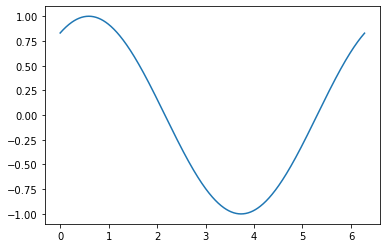

In [43]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


anim = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

from IPython.display import HTML
HTML(anim.to_html5_video())